<a href="https://colab.research.google.com/github/fsdfsd123/DM2020-Lab1-Master/blob/master/third.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GET DATA

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
%cd drive/My Drive/data mining/DM2020-Lab1-Master-master

[Errno 2] No such file or directory: 'drive/My Drive/data mining/DM2020-Lab1-Master-master'
/content/drive/My Drive/data mining/DM2020-Lab1-Master-master


In [67]:
# categories
categories = [0,1,2]
categorie_names = ['amazon', 'imdb', 'yelp']

In [68]:
# obtain the documents containing the categories provided
import pandas as pd
text_data_files = ["amazon_cells_labelled.txt","imdb_labelled.txt","yelp_labelled.txt"]
text_data_df = []
for i in range(0,len(text_data_files)):
  df = pd.read_csv(
      'lab1-textdata/'+text_data_files[i], sep='\t',header=None)
  df.columns = ['text','score']
  df['category'] = categories[i]
  df['category_name'] = categorie_names[i]
  text_data_df.append(df)
text_data_df_result = pd.concat([text_data_df[0],text_data_df[1],text_data_df[2]],axis=0, ignore_index=True)
text_data_df_result

,text,score,category,category_name
0,So there is no way for me to plug it in here i...,0,0,amazon
1,"Good case, Excellent value.",1,0,amazon
2,Great for the jawbone.,1,0,amazon
3,Tied to charger for conversations lasting more...,0,0,amazon
4,The mic is great.,1,0,amazon
...,...,...,...,...
2743,I think food should have flavor and texture an...,0,2,yelp
2744,Appetite instantly gone.,0,2,yelp
2745,Overall I was not impressed and would not go b...,0,2,yelp
2746,"The whole experience was underwhelming, and I ...",0,2,yelp


In [69]:
import sys
sys.path.append('/content/drive/My Drive/data mining/DM2020-Lab1-Master-master')
import pandas as pd
from helpers import data_mining_helpers as dmh
X = text_data_df_result

In [70]:
X.dropna(inplace=True)

In [71]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [73]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [74]:
analyze = count_vect.build_analyzer()

In [78]:
from sklearn.decomposition import PCA

In [79]:
X_counts.toarray().shape

(2748, 5155)

In [80]:
X_reduced = PCA(n_components = 4).fit_transform(X_counts.toarray())

In [81]:
X_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [82]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [83]:
mlb = preprocessing.LabelBinarizer()

In [84]:
mlb.fit(X.category)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [85]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [86]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [87]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [88]:
X

,text,score,category,category_name,bin_category,unigrams
0,So there is no way for me to plug it in here i...,0,0,amazon,"[1, 0, 0]","[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,0,amazon,"[1, 0, 0]","[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,0,amazon,"[1, 0, 0]","[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,0,amazon,"[1, 0, 0]","[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,0,amazon,"[1, 0, 0]","[The, mic, is, great, .]"
...,...,...,...,...,...,...
2743,I think food should have flavor and texture an...,0,2,yelp,"[0, 0, 1]","[I, think, food, should, have, flavor, and, te..."
2744,Appetite instantly gone.,0,2,yelp,"[0, 0, 1]","[Appetite, instantly, gone, .]"
2745,Overall I was not impressed and would not go b...,0,2,yelp,"[0, 0, 1]","[Overall, I, was, not, impressed, and, would, ..."
2746,"The whole experience was underwhelming, and I ...",0,2,yelp,"[0, 0, 1]","[The, whole, experience, was, underwhelming, ,..."


# **other visualization**

count of unigrams(the word number of each sequence)

In [89]:
X['unigrams_count'] = X['unigrams'].apply(lambda x: len(x))

In [90]:
import plotly.express as px
dataframe = X
df = dataframe.sort_values(by='unigrams_count', ascending=False)
fig = px.line(df, y='unigrams_count', x='text')
fig.update_yaxes(range=[0, 100])
fig.show()

Most Frequently Occuring nigrams

In [91]:
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
ADDITIONAL_STOPWORDS = ['covfefe']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [92]:
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [93]:
words = basic_clean(''.join(str(df['text'].tolist())))

In [94]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]

(work, great)          20
(go, back)             18
(waste, time)          17
(customer, service)    14
(would, recommend)     14
(ive, ever)            14
(sound, quality)       13
(one, best)            12
(dont, waste)          12
(waste, money)         11
dtype: int64

In [95]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12] #
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:12]

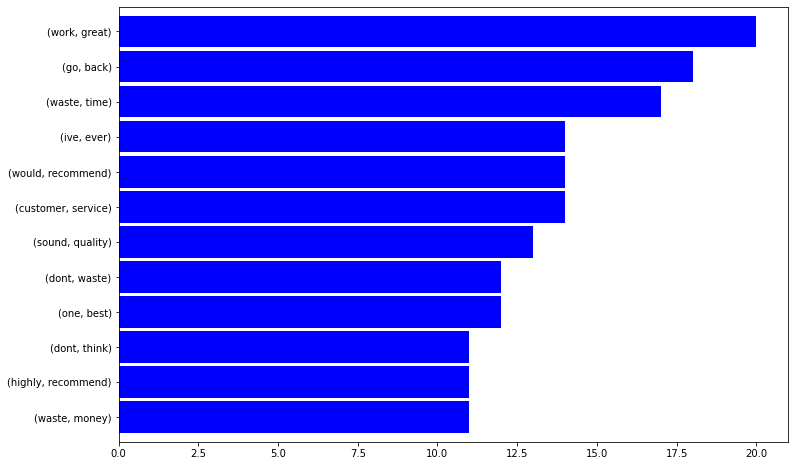

In [146]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

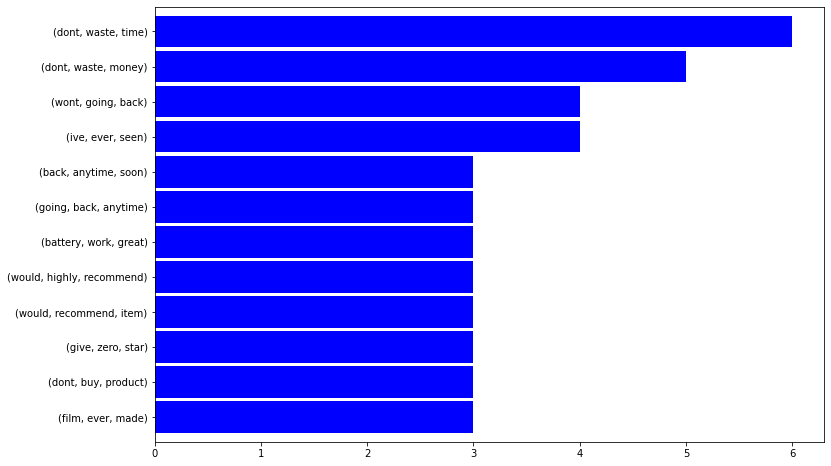

In [147]:
trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

word-embedding word2vec visualization

In [ ]:
!pip install --upgrade gensim
from gensim.models import Word2Vec
import pandas as pd
import nltk
nltk.download('punkt')
import numpy as np

In [102]:
model = Word2Vec(X['unigrams'][0:50],size=len(X['unigrams'][0:50]),sg=1,min_count=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



array([ 0.00038604, -0.00762292,  0.00373689, -0.01008368,  0.00180911,
        0.00987324,  0.01040639, -0.00604287,  0.0044196 ,  0.00606141,
        0.00112589, -0.00635763, -0.00954702,  0.00634845,  0.00179225,
        0.00109373,  0.00402398, -0.00157324, -0.00952301, -0.00702885,
        0.00131788,  0.01060062,  0.00012131, -0.01105682,  0.00346232,
       -0.00116506, -0.00433494, -0.00060969,  0.0006687 , -0.00804233,
       -0.00140408,  0.00970306,  0.00040491, -0.00648122,  0.00526194,
       -0.00814474,  0.00501032, -0.01107011,  0.00951575,  0.00276127,
        0.00626193, -0.00650632, -0.00767468,  0.00452305, -0.00457022,
       -0.00776337,  0.00273629, -0.0052167 , -0.00250428,  0.00826178],
      dtype=float32)

In [103]:
words=list(model.wv.vocab)

['So', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'the', 'US', 'unless', 'I', 'go', 'by', 'a', 'converter', '.', 'Good', 'case', ',', 'Excellent', 'value', 'Great', 'jawbone', 'Tied', 'charger', 'conversations', 'lasting', 'more', 'than', '45', 'minutes.MAJOR', 'PROBLEMS', '!', 'The', 'mic', 'great', 'have', 'jiggle', 'get', 'line', 'up', 'right', 'decent', 'volume', 'If', 'you', 'several', 'dozen', 'or', 'hundred', 'contacts', 'then', 'imagine', 'fun', 'of', 'sending', 'each', 'them', 'one', 'are', 'Razr', 'owner', '...', 'must', 'this', 'Needless', 'say', 'wasted', 'my', 'money', 'What', 'waste', 'and', 'time', 'And', 'sound', 'quality', 'He', 'was', 'very', 'impressed', 'when', 'going', 'from', 'original', 'battery', 'extended', 'two', 'were', 'seperated', 'mere', '5+', 'ft', 'started', 'notice', 'excessive', 'static', 'garbled', 'headset', 'Very', 'good', 'though', 'design', 'odd', 'as', 'ear', '``', 'clip', "''", 'not', 'comfortable', 'at', 'all', '

In [104]:
wweX=model[model.wv.vocab]
wweX
wwedf=pd.DataFrame(wweX)
wwedf.shape
wwedf.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,-0.006063,-0.009543,-0.009726,-0.005968,-0.004719,-0.005017,-0.000480,-0.001768,-0.006003,-0.000207,-0.006632,-0.002667,-0.005510,-0.004713,0.004191,-0.007072,-0.008558,-0.005455,0.008202,0.007444,0.005811,0.005257,-0.009388,-0.004553,-0.006490,0.002052,-0.011073,0.009383,-0.005716,-0.002586,-0.008325,0.006115,-0.009297,0.005661,0.000893,-0.001535,0.007329,0.009059,-0.002693,-0.009100,-0.006880,-0.004905,-0.001455,0.003495,-0.002656,0.007227,-0.002776,0.007854,-0.008510,-0.001093
1,-0.004918,-0.004037,-0.001963,0.001496,-0.001402,-0.003805,0.005442,0.002769,-0.009659,0.009428,0.004430,-0.002017,-0.009907,0.007224,-0.008020,-0.007959,0.004562,-0.003073,0.002091,0.008088,0.000878,-0.009306,0.003784,-0.004773,0.003619,-0.009465,-0.001902,-0.003490,-0.000915,0.002736,0.000424,0.000685,0.001095,0.002247,0.004674,-0.003926,0.001834,0.003087,-0.007638,-0.002348,0.001733,-0.005500,-0.000786,0.003251,-0.008731,-0.000154,-0.005136,-0.001942,0.007052,-0.005796
2,0.007631,-0.002215,-0.000625,-0.004670,-0.005336,0.010937,-0.001277,0.004910,0.002677,0.007024,-0.001405,0.005651,-0.007847,0.008255,-0.003865,0.008697,-0.005526,0.006898,-0.001663,-0.005019,0.000317,0.008850,-0.007742,-0.002034,-0.003620,-0.007809,-0.009610,-0.009147,0.010211,-0.009524,0.006619,-0.007981,-0.005807,-0.002397,-0.003954,0.000138,0.001594,0.000282,-0.001222,0.004358,0.001194,-0.000765,0.007341,0.006528,-0.010059,-0.007649,-0.007535,0.004900,0.002905,-0.003188
3,-0.008100,0.003987,0.005668,-0.008297,0.006561,-0.002173,0.006587,-0.007865,-0.001686,-0.003301,0.007307,0.008145,0.002206,-0.004507,-0.004686,0.006472,-0.003396,-0.004995,0.004394,0.000593,-0.001328,0.004654,0.002959,0.004515,0.007201,-0.005227,0.004323,0.000977,-0.009319,0.006996,-0.004123,-0.004593,-0.007102,0.005274,0.004043,-0.004089,-0.008724,0.001067,-0.005725,-0.000653,-0.000639,0.008713,-0.007774,-0.000475,0.003852,0.001342,0.002422,-0.009641,0.007100,-0.006919
4,-0.004050,0.001940,0.009537,0.007577,0.009426,0.000821,-0.001891,0.002190,0.003598,-0.000398,-0.005292,0.007365,-0.000577,0.008611,0.006801,-0.008262,-0.010649,-0.008402,-0.004844,0.008633,0.007725,0.006877,-0.009678,0.001579,-0.002877,-0.006765,-0.009876,0.001007,0.004203,0.002394,0.003686,0.005730,-0.008623,-0.007650,0.001284,-0.006597,0.005072,0.001425,0.006407,-0.000946,-0.001309,-0.008445,-0.001102,0.009116,-0.000976,0.004962,0.008125,0.010287,-0.008585,0.007058


In [105]:
#Computing the correlation matrix
X_corr=wwedf.corr()

#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
neww_X=np.dot(wweX,new_vectors)

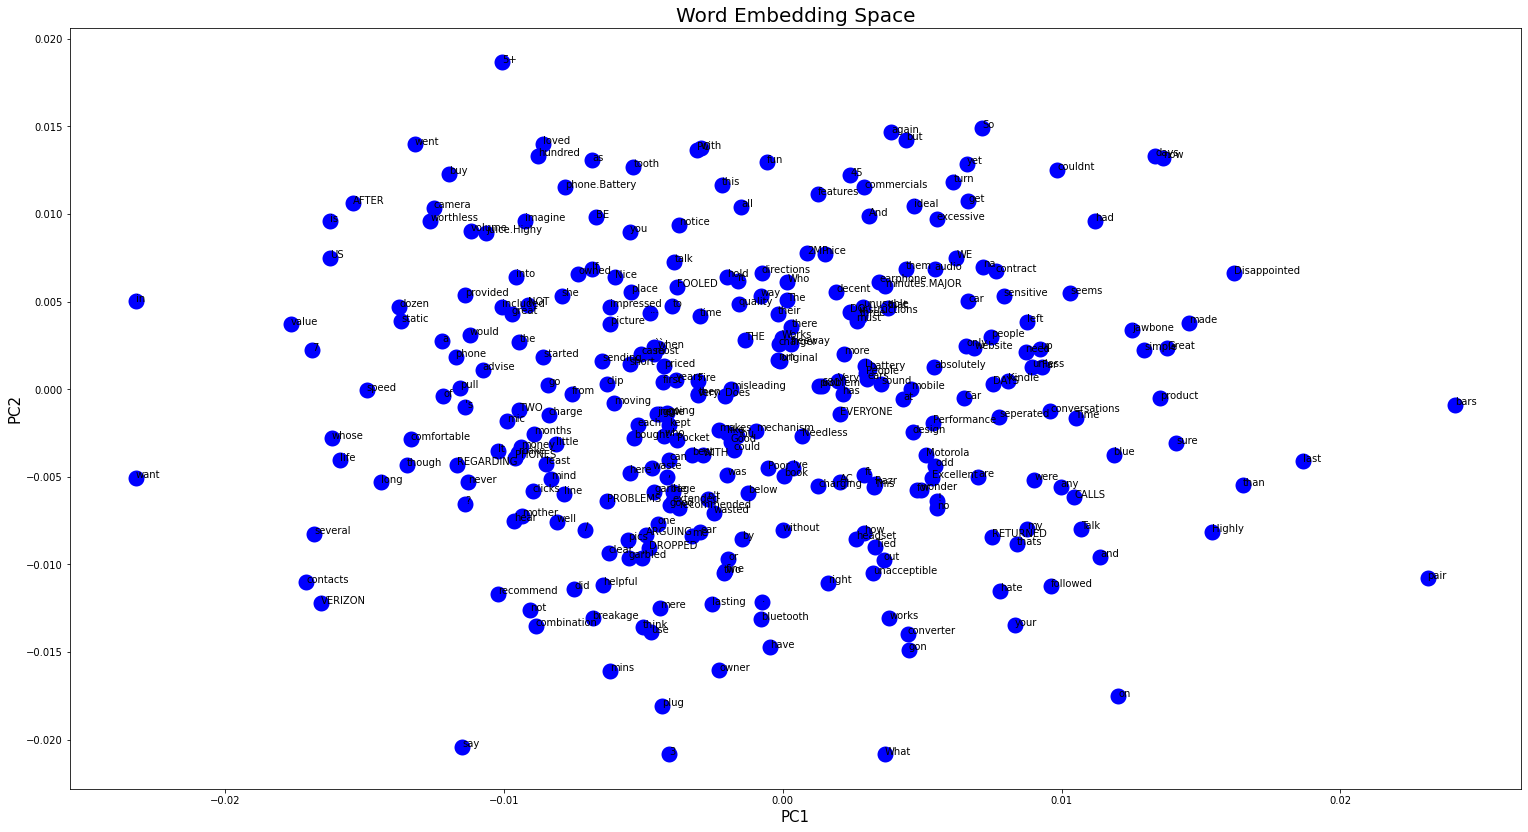

In [106]:
import matplotlib.pyplot as plt
plt.figure(figsize=(26,14))
plt.scatter(neww_X[:,0],neww_X[:,1],linewidths=10,color='blue')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space",size=20)
vocab=list(model.wv.vocab)
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))


cosine_similarity of every word with every other word

In [109]:
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity
size = 10
consine_array = np.zeros((size,len(X['text'])))

# the calculate is too slow, calculate the first 10
for i in range(0,10): 
  buffer1 = []
  buffer1.append(X['text'][i])
  buffer1 = binarize(count_vect.transform(buffer1).todense())
  for j in range(len(X['text'])):
    buffer2 = []
    buffer2.append(X['text'][j])
    buffer2 = binarize(count_vect.transform(buffer2).todense())
    if(j!=i):
      consine_array[i][j] = cosine_similarity(buffer1, buffer2, dense_output=True)


In [110]:
consine_array

array([[0.        , 0.        , 0.23570226, ..., 0.08333333, 0.1767767 ,
        0.28284271],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.23570226, 0.        , 0.        , ..., 0.        , 0.125     ,
        0.1       ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.07071068],
       [0.09622504, 0.        , 0.        , ..., 0.        , 0.10206207,
        0.24494897],
       [0.        , 0.        , 0.        , ..., 0.14433757, 0.20412415,
        0.16329932]])

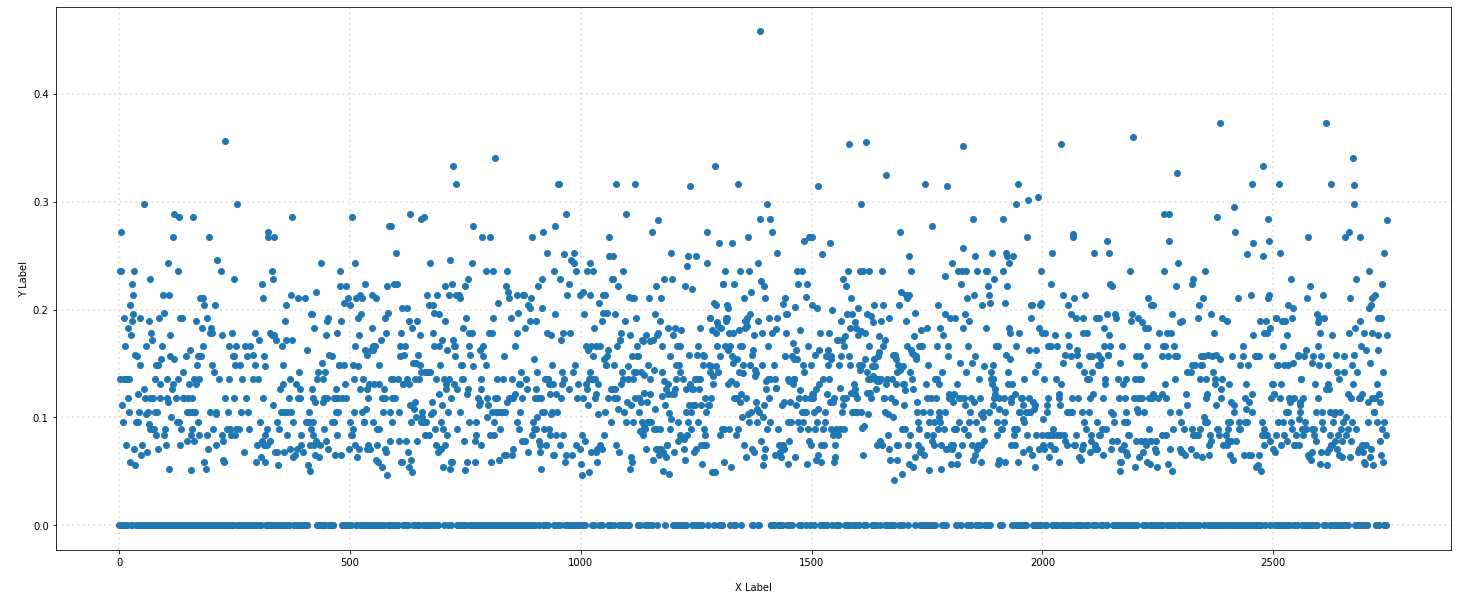

In [111]:
#the first word compare to other word
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()
xs = range(0,len(X['text']))
ys = consine_array[0]
ax.scatter(xs, ys)
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
plt.show()

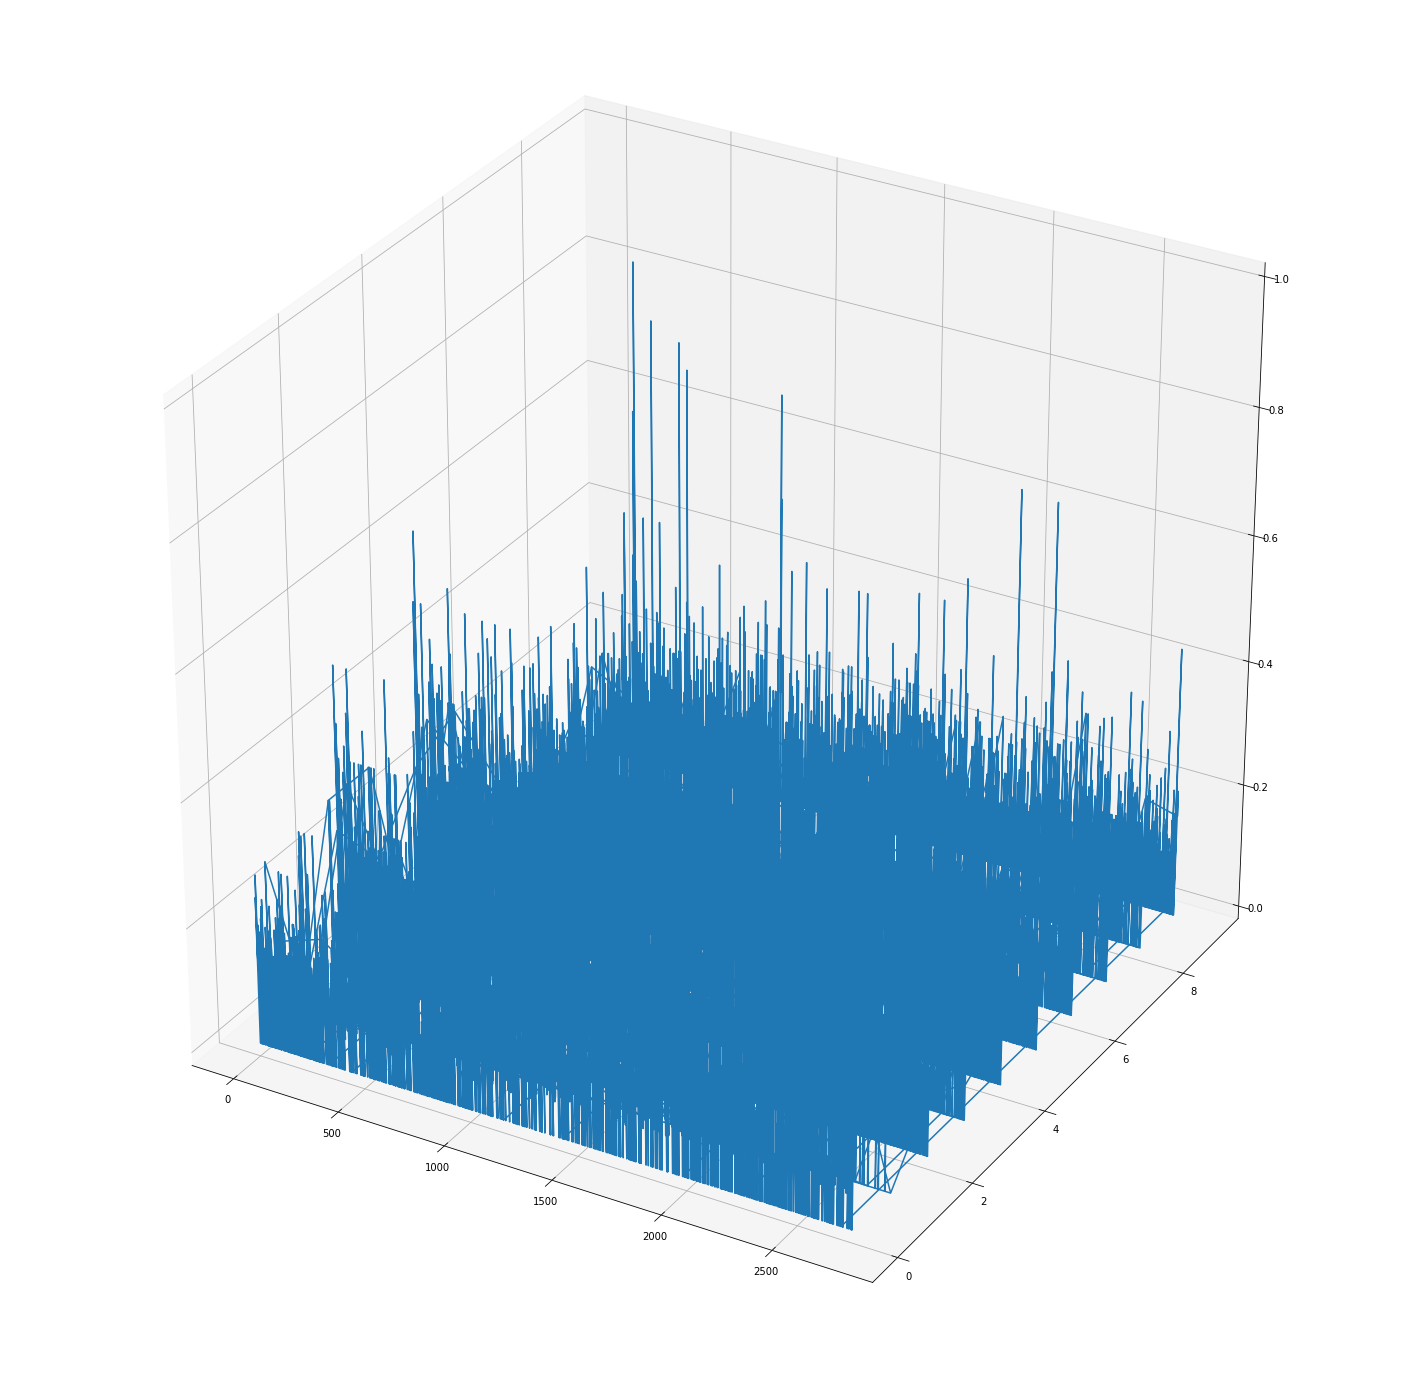

In [112]:
#the first ten words each compare to other word
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (25,25))


ax = fig.gca(projection='3d')

ax.set_zlim3d(0,1)
x = np.arange(0, 10, 1) # reprsent the first word till the last word
y = np.arange(0, len(X['text']), 1) # represent the first doc till the last
plotX, plotY = np.meshgrid(y, x)
plotZ = consine_array #the frequency of every word
surf = ax.plot_wireframe(plotX, plotY, plotZ)
plt.show()

CLASSFILER

TF-IDF 

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np

def get_tf_idf_reduced_norm_data(corpus,pca_n=4,norm_range=[0,1]):
  vectorizer = TfidfVectorizer()
  tf_idf = vectorizer.fit_transform(corpus)
  tf_idf_reduced = PCA(n_components = pca_n).fit_transform(tf_idf.toarray())
  min_max_scaler = preprocessing.MinMaxScaler(norm_range)
  tf_idf_reduced = min_max_scaler.fit_transform(tf_idf_reduced)
  return tf_idf_reduced

In [114]:
vectorizer = TfidfVectorizer()
tf_idf = vectorizer.fit_transform(X['text'])
tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [115]:
#get useful data
from sklearn.naive_bayes import MultinomialNB
XX = get_tf_idf_reduced_norm_data(X['text'])
YY = X['score']

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(XX, YY, test_size=0.25)

In [117]:
X_train,Y_train

(array([[0.42591683, 0.18250951, 0.58903907, 0.37284607],
        [0.45092084, 0.3224714 , 0.46129415, 0.45597711],
        [0.42777092, 0.2861383 , 0.49266652, 0.37180882],
        ...,
        [0.47399424, 0.15782263, 0.60197967, 0.25872821],
        [0.54200029, 0.22604528, 0.4800923 , 0.36037169],
        [0.2455962 , 0.50639168, 0.67451002, 0.31958567]]), 1596    1
 721     1
 243     0
 112     1
 1282    0
        ..
 163     1
 2607    0
 2573    0
 468     0
 298     0
 Name: score, Length: 2061, dtype: int64)

In [136]:
#original Bernoulli naive Bayes
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.5152838427947598

In [140]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
bnb.predict(get_tf_idf_reduced_norm_data(corpus))

array([0, 1, 1, 1])

In [119]:
#Multinomial naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
mnb.score(X_test, Y_test)

0.586608442503639

In [141]:
mnb.predict(get_tf_idf_reduced_norm_data(corpus))

array([1, 1, 1, 1])

In [120]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
gnb.score(X_test, Y_test)

0.5938864628820961

In [142]:
gnb.predict(get_tf_idf_reduced_norm_data(corpus))

array([0, 0, 0, 1])

frequency

In [121]:
X_counts.toarray().shape

(2748, 5155)

In [122]:
counts_reduced = PCA(n_components = 4).fit_transform(X_counts.toarray())
min_max_scaler = preprocessing.MinMaxScaler()
counts_reduced_norm = min_max_scaler.fit_transform(counts_reduced)

In [123]:
XX = counts_reduced_norm
YY = X['score']
X_train, X_test, Y_train, Y_test = train_test_split(XX, YY, test_size=0.25)

In [124]:
X_train,Y_train

(array([[6.90387432e-03, 4.23241841e-01, 3.72471981e-01, 2.85797693e-01],
        [2.24982255e-02, 3.93501052e-01, 5.51419976e-01, 2.35070074e-01],
        [9.14221002e-03, 4.37119553e-01, 4.35618287e-01, 2.56118810e-01],
        ...,
        [1.01998826e-02, 4.09827110e-01, 4.82925588e-01, 2.75948942e-01],
        [9.48211238e-03, 4.41159412e-01, 4.83391797e-01, 2.63314376e-01],
        [3.20904977e-04, 4.23072579e-01, 4.62131403e-01, 2.64646676e-01]]),
 207     1
 1928    0
 578     1
 1037    1
 996     0
        ..
 2261    1
 1010    1
 662     1
 1932    1
 1843    0
 Name: score, Length: 2061, dtype: int64)

In [125]:
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.5152838427947598

In [144]:
bnb.predict(get_tf_idf_reduced_norm_data(corpus))

array([0, 1, 1, 1])

In [126]:
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
mnb.score(X_test, Y_test)

0.5138282387190685

In [ ]:
mnb.predict(get_tf_idf_reduced_norm_data(corpus))

In [127]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
gnb.score(X_test, Y_test)

0.519650655021834

In [143]:
gnb.predict(get_tf_idf_reduced_norm_data(corpus))

array([0, 0, 0, 1])